# INTRODUÇÃO E COLETA DOS DADOS

Este dataset contém avaliações de produtos de duas das maiores plataformas de comércio eletrônico no Brasil: Amazon e Mercado Livre. O objetivo é realizar uma análise de sentimentos nas avaliações dos produtos, que são compostas por 4 colunas e 9815 linhas:

Search Query: A consulta de busca realizada pelo usuário.

Product Title: O título do produto listado na plataforma de vendas.

Link: O link direto para a página do produto na plataforma de vendas.

Review: O texto da avaliação deixada pelo cliente após a compra ou uso do produto.

O objetivo deste notebook é realizar a análise de sentimentos em textos, especificamente para classificar os comentários dos clientes como positivos, negativos ou neutros. Para isso, serão utilizadas ferramentas como NLTK e TextBlob, que oferecem modelos e funções pré-treinadas para análise de sentimentos. Essa análise permitirá entender melhor as opiniões dos consumidores e identificar quais aspectos dos produtos geram maior satisfação ou insatisfação.

Link do dataset: https://www.kaggle.com/datasets/sampaiovitor/avaliaes-em-portugus-amazon-e-mercado-livre

# Importação das bibliotecas e informações do dataset

In [1]:
#conectar ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install unidecode
!pip install emot
!pip instal vaderSentiment
!pip install textblob
!pip install autocorrect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.5 MB/s eta 0:00:00
ERROR: unknown command "instal" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=90a3515a9fe0a9d1adaec8e54012dc08fa2f8f60139c2cf78def0188405a3834
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect


In [3]:
!python -m spacy download pt_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


In [5]:
#import das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('pukt')
nltk.download('rslp')
nltk.download('punkt_tab')

import re
import datetime as dt
import numpy as np
import string
import unidecode
from autocorrect import Speller
spell = Speller(lang='pt')
stemmer = nltk.stem.RSLPStemmer()


import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords


from textblob import TextBlob


import emot
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO

import spacy



pd.set_option("display.max_colwidth", None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading pukt: Package 'pukt' not found in index
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


dictionary for this language not found, downloading...
__________________________________________________
couldn't download http://ipfs.io/ipfs/QmbRSZvfJV6zN12zzWhecphcvE9ZBeQdAJGQ9c9ttJXzcg/pt.tar.gz, trying next url...
__________________________________________________
couldn't download https://gateway.pinata.cloud/ipfs/QmbRSZvfJV6zN12zzWhecphcvE9ZBeQdAJGQ9c9ttJXzcg/pt.tar.gz, trying next url...
__________________________________________________
couldn't download https://cf-ipfs.com/ipfs/QmbRSZvfJV6zN12zzWhecphcvE9ZBeQdAJGQ9c9ttJXzcg/pt.tar.gz, trying next url...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [6]:
#pasta do arquivo
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/am_scrape_final.csv")

In [7]:
#verificar as 5 primeiras do dataset
df.head()

,Search Query,Product Title,Link,Review
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto."
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Minha experiência de 10 dias de uso com o Xiaomi Redmi Note 12 128GB / 6GB RAM:Chegou rápido em cerca de 3 dias úteis.-Prós:*Tela: Excelente, os 120Hz trazem uma experiência visual fluida e agradável para filmes e fotos.*Câmera: Ótima, os 50MP captam ótimas fotos em ambientes com boa iluminação natural.*Processador: Ótimo, O Snapdragon 865 é um bom processador para esta faixa de preço, oferece um ótimo desempenho para apps populares do dia a dia, sem travamentos.*Games: Muito Bom, dos jogos que testei tive uma ótima experiência de fluidez e poucos travamentos, destaque para o Call of Duty mobile que possui uma excelente otimização para este aparelho. Rodei nestas configs no app Game Booster: -FreeFire 60FPS [Ultra] -eFootball 2023 60 FPS [High] -Call of Duty: Mobile 60 FPS [High] -PUBG 37 FPS [Low ] -FIFA Mobile 30 FPS [Medium] -Runescape 3 30~50 FPS[Low] -Genshin Impact 25~30FPS [Low] -Fornite 15~30FPS[Low]É importante ressaltar que este é um Smartphone de entrada e não voltado para gamers, então eventuais quedas de frames e leves travamentos são esperados em alguns jogos. Apesar disso o desempenho foi satisfatório em todos os jogos menos no modo Battle Royale do Fornite onde a queda de frames foi alta pois o jogo ainda não é otimizado para esse celular, porém em outros modos com mapas menores ele se mantém em 25~30FPS.*Bateria: Excelente, dura o dia todo, destaque para o carregador ultra-rápido de 33W que permite uma carga completa em apenas 1 hora.-Contras:*Bloatwares chineses: ele vem com alguns apps chineses pré instalados (AliExpress,Shopee, TikTok...) . Esses aplicativos podem solicitar permissões de acesso e exibir propagandas. Porém, é possível remover ou desativar eles.*Embora a tela seja de 120Hz, nem todos os apps suportam essa taxa de atualização. Isso inclui o aplicativo do YouTube, que tem uma restrição máxima de 60FPS 1080p, não permitindo resoluções maiores como 2k e 4k.*Não grava videos a 6

In [8]:
#colunas do dataset
df.columns

Index(['Search Query', 'Product Title', 'Link', 'Review'], dtype='object')

In [9]:
#5 primeiras linhas da coluna Review
df['Review'].head()

,Review
0,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto."
1,"Minha experiência de 10 dias de uso com o Xiaomi Redmi Note 12 128GB / 6GB RAM:Chegou rápido em cerca de 3 dias úteis.-Prós:*Tela: Excelente, os 120Hz trazem uma experiência visual fluida e agradável para filmes e fotos.*Câmera: Ótima, os 50MP captam ótimas fotos em ambientes com boa iluminação natural.*Processador: Ótimo, O Snapdragon 865 é um bom processador para esta faixa de preço, oferece um ótimo desempenho para apps populares do dia a dia, sem travamentos.*Games: Muito Bom, dos jogos que testei tive uma ótima experiência de fluidez e poucos travamentos, destaque para o Call of Duty mobile que possui uma excelente otimização para este aparelho. Rodei nestas configs no app Game Booster: -FreeFire 60FPS [Ultra] -eFootball 2023 60 FPS [High] -Call of Duty: Mobile 60 FPS [High] -PUBG 37 FPS [Low ] -FIFA Mobile 30 FPS [Medium] -Runescape 3 30~50 FPS[Low] -Genshin Impact 25~30FPS [Low] -Fornite 15~30FPS[Low]É importante ressaltar que este é um Smartphone de entrada e não voltado para gamers, então eventuais quedas de frames e leves travamentos são esperados em alguns jogos. Apesar disso o desempenho foi satisfatório em todos os jogos menos no modo Battle Royale do Fornite onde a queda de frames foi alta pois o jogo ainda não é otimizado para esse celular, porém em outros modos com mapas menores ele se mantém em 25~30FPS.*Bateria: Excelente, dura o dia todo, destaque para o carregador ultra-rápido de 33W que permite uma carga completa em apenas 1 hora.-Contras:*Bloatwares chineses: ele vem com alguns apps chineses pré instalados (AliExpress,Shopee, TikTok...) . Esses aplicativos podem solicitar permissões de acesso e exibir propagandas. Porém, é possível remover ou desativar eles.*Embora a tela seja de 120Hz, nem todos os apps suportam essa taxa de atualização. Isso inclui o aplicativo do YouTube, que tem uma restrição máxima de 60FPS 1080p, não permitindo resoluções maiores como 2k e 4k.*Não grava videos a 60FPS e não grava em 4K. A resolução máxima de gravação dele é 1080p 30fps. No entanto, oferece o modo de câmera lenta (slow motion) que grava videos a 960FPS 720p.*Lente Macro de apenas 2 MP. Além de pecar em fotos noturnas.Resumindo é um excelente Smartphone pela sua faixa

In [10]:
#informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Search Query   9815 non-null   object
 1   Product Title  9815 non-null   object
 2   Link           9815 non-null   object
 3   Review         9815 non-null   object
dtypes: object(4)
memory usage: 306.8+ KB


Sem valores nulos

In [11]:
#Produtos Mais Avaliados

produto_avaliado = df.groupby('Product Title').size().reset_index(name='Num_Avaliacoes')

produto_avaliado = produto_avaliado.sort_values(by='Num_Avaliacoes', ascending=False)

#os 10 produtos mais avaliados
produto_avaliado_top = produto_avaliado.head(10)
print("Top 10 Produtos Mais Avaliados:")
print(produto_avaliado_top)


Top 10 Produtos Mais Avaliados:
                                                                                                                                       Product Title  \
496     Mochila de viagem grande feminina, mochila de mão, mochila de caminhada impermeável para esportes ao ar livre mochila casual mochila escolar   
883  Xiaomi TWSEJ04LS Fones de ouvido Redmi Airdots, Bluetooth, à prova de suor, verdadeiros fones de ouvido sem fio, versão global - preto, pequeno   
880                                                                                             Xiaomi Redmi Note 11 Graphite Gray 6GB Ram 128GB Rom   
882                                                                                                                               Xiaomi TV Stick 4K   
879      Xiaomi Redmi Buds 4 Pro TWS Bluetooth Fone de Ouvido 5.3 Cancelamento de Ruído Ativo 3 Mic Fones de Ouvido Sem Fio 36 Horas de Vida (preto)   
878                                                     

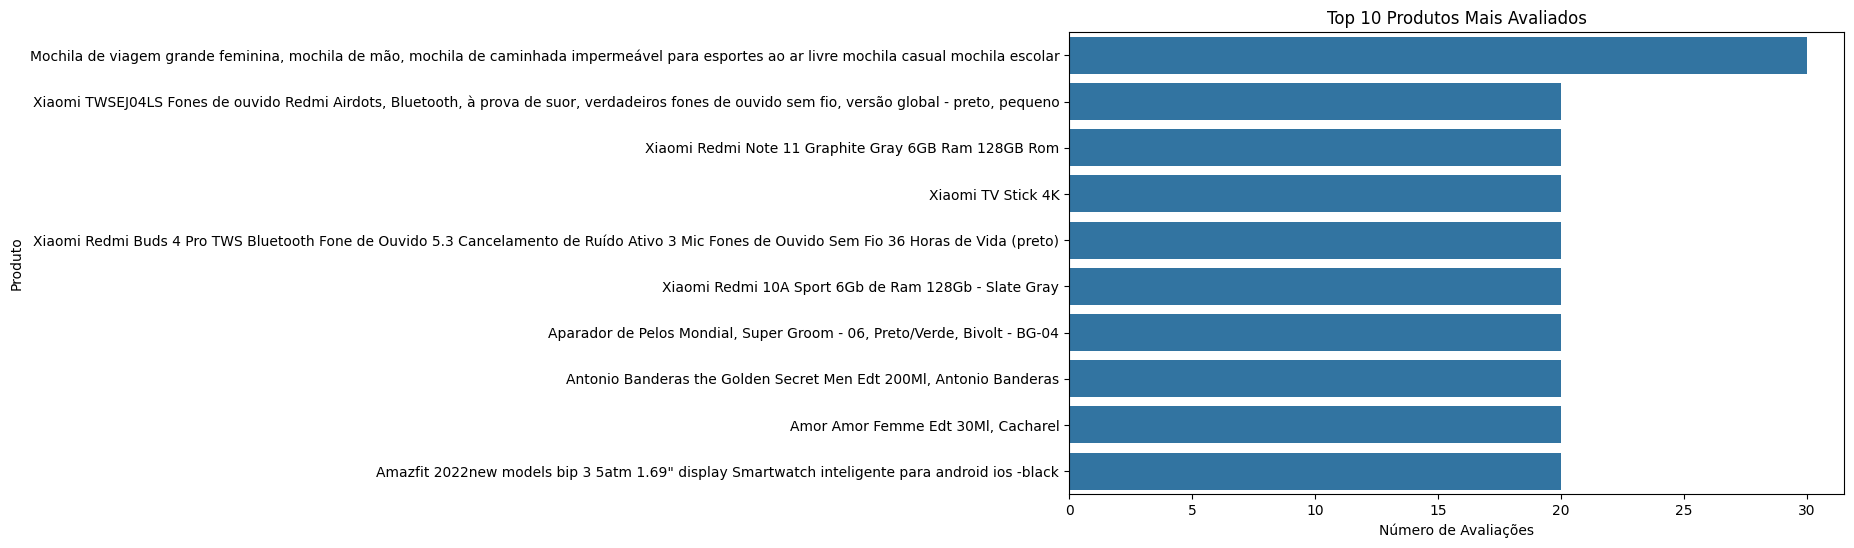

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#os 10 produtos mais avaliados
plt.figure(figsize=(10,6))
sns.barplot(x='Num_Avaliacoes', y='Product Title', data=produto_avaliado_top)
plt.title('Top 10 Produtos Mais Avaliados')
plt.xlabel('Número de Avaliações')
plt.ylabel('Produto')
plt.show()


In [13]:
#termos Mais Pesquisados (Search Query)

pesquisa_frequente = df.groupby('Search Query').size().reset_index(name='Num_Pesquisas')


pesquisa_frequente = pesquisa_frequente.sort_values(by='Num_Pesquisas', ascending=False)


pesquisa_frequente_top = pesquisa_frequente.head(10)
print("\nTop 10 Termos Mais Pesquisados:")
print(pesquisa_frequente_top)



Top 10 Termos Mais Pesquisados:
               Search Query  Num_Pesquisas
31               smartphone            664
24                    mouse            609
6     caixa de som portatil            565
37                  teclado            505
34                     ssd             496
26        perfume importado            488
23                  mochila            358
8            camera digital            330
14    ferro de passar roupa            322
15  fones de ouvido sem fio            313


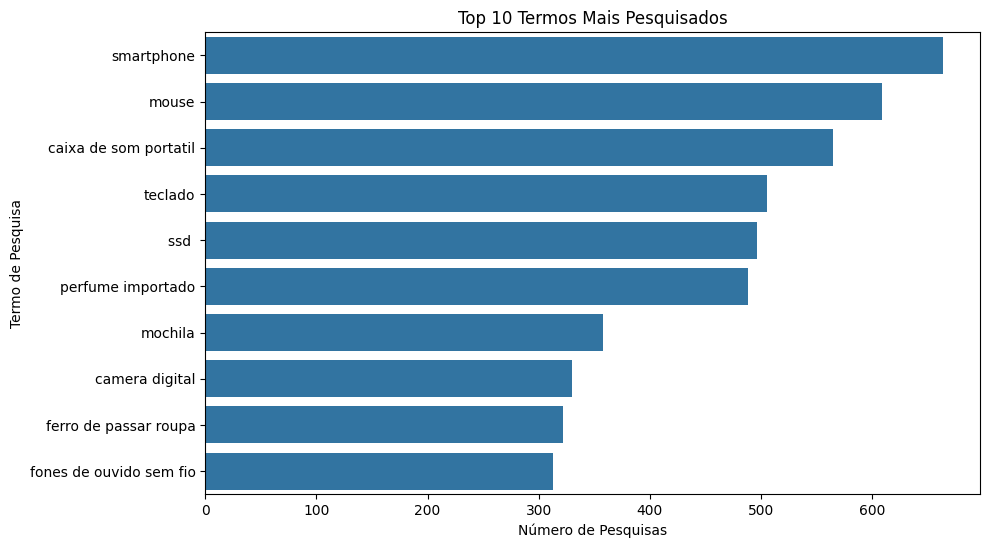

In [14]:
#10 termos de pesquisa mais frequentes
plt.figure(figsize=(10,6))
sns.barplot(x='Num_Pesquisas', y='Search Query', data=pesquisa_frequente_top)
plt.title('Top 10 Termos Mais Pesquisados')
plt.xlabel('Número de Pesquisas')
plt.ylabel('Termo de Pesquisa')
plt.show()



Quantidades de Comentários Curtos, Médios e Longos:
Comment_Length
Médio    4915
Curto    3470
Longo    1430
Name: count, dtype: int64


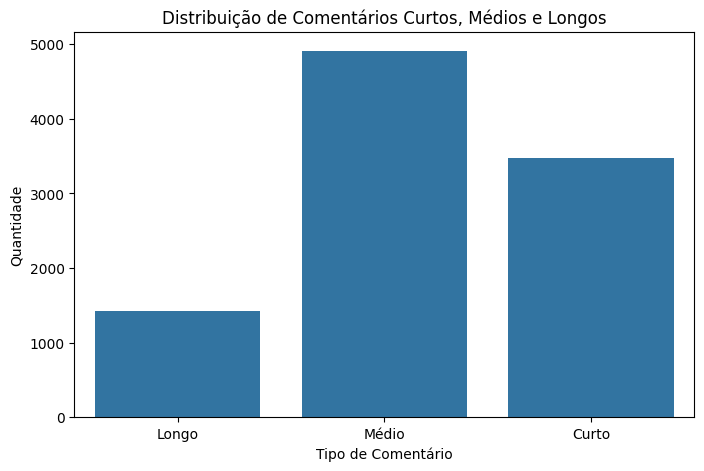

In [15]:
#Quantidade de Comentários Curtos e Longos
def classify_comment_length(text):
    word_count = len(str(text).split())
    if word_count < 10:
        return 'Curto'
    elif word_count > 50:
        return 'Longo'
    else:
        return 'Médio'

df['Comment_Length'] = df['Review'].apply(classify_comment_length)

comment_length_counts = df['Comment_Length'].value_counts()

print("\nQuantidades de Comentários Curtos, Médios e Longos:")
print(comment_length_counts)

plt.figure(figsize=(8,5))
sns.countplot(x='Comment_Length', data=df)
plt.title('Distribuição de Comentários Curtos, Médios e Longos')
plt.xlabel('Tipo de Comentário')
plt.ylabel('Quantidade')
plt.show()


# Pré-Processamento – Limpeza e tokenização dos textos

In [16]:
#verificando duplicatas
duplicados = df['Review'].value_counts()
duplicados = duplicados[duplicados > 1]  # só os que aparecem mais de uma vez
print(duplicados)



Review
Muito bom                                                                                                                                                                                                                                                                                                                                           53
Bom                                                                                                                                                                                                                                                                                                                                                 24
Gostei                                                                                                                                                                                                                                                                                                             

Resolvi remover os comentarios mais curtos e repetitivos pois não oferecem contexto suficiente.

In [17]:
#remoção de comentários muito curtos e repetidos

df['Review_Length'] = df['Review'].apply(lambda x: len(str(x).split()))

comentarios_frequentes = df['Review'].value_counts()
comentarios_remover = comentarios_frequentes[comentarios_frequentes > 10].index.tolist()

comentarios_remover_final = [comentario for comentario in comentarios_remover if len(comentario.split()) <= 3]

df = df[~df['Review'].isin(comentarios_remover_final)]

print(f"Removidos {len(comentarios_remover_final)} tipos de comentários curtos e muito repetidos.")


Removidos 8 tipos de comentários curtos e muito repetidos.


In [18]:
#Total de registros antes da limpeza
total_antes = 9815

total_depois = df.shape[0]

print(f"Antes da limpeza: {total_antes} comentários")
print(f"Depois da limpeza: {total_depois} comentários")
print(f"Comentários removidos: {total_antes - total_depois}")


Antes da limpeza: 9815 comentários
Depois da limpeza: 9641 comentários
Comentários removidos: 174


In [60]:
#Spacy
nlp = spacy.load('pt_core_news_sm')


def pre_processing(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)


    text = re.sub(r'[^A-Za-záàâãéèêíóôõúç\s]', '', text)


    stop_words = set(stopwords.words('portuguese'))
    newStopWords = ['q', 'vc', 'pq', 'rs', 'pra', 'tá', 'vai', 'pa', 've', 'ta', 'é', 'to', 'tb',
                    'ir', 'n', 'p', 'ai', 'kkk', 'haha', 'aff', 'já', 'o', 'as', 'uma', 'fez', 'com','é', "de", "o", "em",'pra']
    stop_words.update(newStopWords)

    #tokenização e remoção de stopwords
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in stop_words]


    #lematização
    words = [lemmatizer.lemmatize(word) for word in words]


    text = unidecode.unidecode(' '.join(words))

    return text

df['cleaned_Review'] = df['Review'].apply(pre_processing)


In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_pt = set(stopwords.words('portuguese'))

df['tokens_sem_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords_pt])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
import spacy
nlp = spacy.load('pt_core_news_sm')

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

df['tokens_lema'] = df['tokens_sem_stopwords'].apply(lemmatize)


In [62]:
df["cleaned_Review"] = df["Review"].apply(lambda x: pre_processing(x))


In [63]:
print(df.columns)


Index(['Search Query', 'Product Title', 'Link', 'Review', 'Comment_Length',
       'Review_Length', 'Review_Lemmatized', 'tokens', 'tokens_sem_stopwords',
       'tokens_lema', 'polarity', 'subjectivity', 'sentiment',
       'sentiment_vader', 'new_sentiment', 'cleaned_Review'],
      dtype='object')


In [64]:
df.head()

,Search Query,Product Title,Link,Review,Comment_Length,Review_Length,Review_Lemmatized,tokens,tokens_sem_stopwords,tokens_lema,polarity,subjectivity,sentiment,sentiment_vader,new_sentiment,cleaned_Review
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto.",Longo,292,necessidade comprar celular custo beneficio comecei pesquisando modelos vendem mercado deparei lideres sempre samsung motorolaapple custobeneficio aqui brasileu smartphones dessas marcas supracitadas nunca xiaomipor conseguinte analisei varios videos varias opcoes cabem citadas agora entregavam boa qualidade apenas algumas caracteristicas porem conjunto completo deixava sempre desejarpartindo premissa sai celular seguinte estadomarca samsungmodelo gran primeano lancamento armazenamento apenas gb memoria internaconsiderando valor mercado atual smartphones catastrficoassocio escolha marca condiz objetivo precisava boa tela tela melhor mercado celulares entrada necessidade boa bateria faz jus marca contar carregamento ultra rapido ainda oferecem buscava boa camera tira melhores fotos mercado nenhum celulares dessa categoria vem mesmas funcoes top linha visava celular travasse gb memoria ram roda jogos pesados play story call of duty genshin impact bem cheguei jogar pouco the legend of neverland roda graficos maximo leg poi propostas faixa preco desse aparelho da jogar todos jogos tranquilamente modo lightportanto aquisicao desse aparelho suprindo necessidades veio melhor pensavaja fiz aquisicao outro amigacomprem medo boa sorte produto,"[necessidade, comprar, celular, custo, beneficio, comecei, pesquisando, modelos, vendem, mercado, deparei, lideres, sempre, samsung, motorolaapple, custobeneficio, aqui, brasileu, smartphones, dessas, marcas, supracitadas, nunca, xiaomipor, conseguinte, analisei, varios, videos, varias, opcoes, cabem, citadas, agora, entregavam, boa, qualidade, apenas, algumas, caracteristicas, porem, conjunto, completo, deixava, sempre, desejarpartindo, premissa, sai, celular, seguinte, estadomarca, samsungmodelo, gran, primeano, lancamento, armazenamento, apenas, gb, memoria, internaconsiderando, valor, mercado, atual, smartphones, catastrficoa

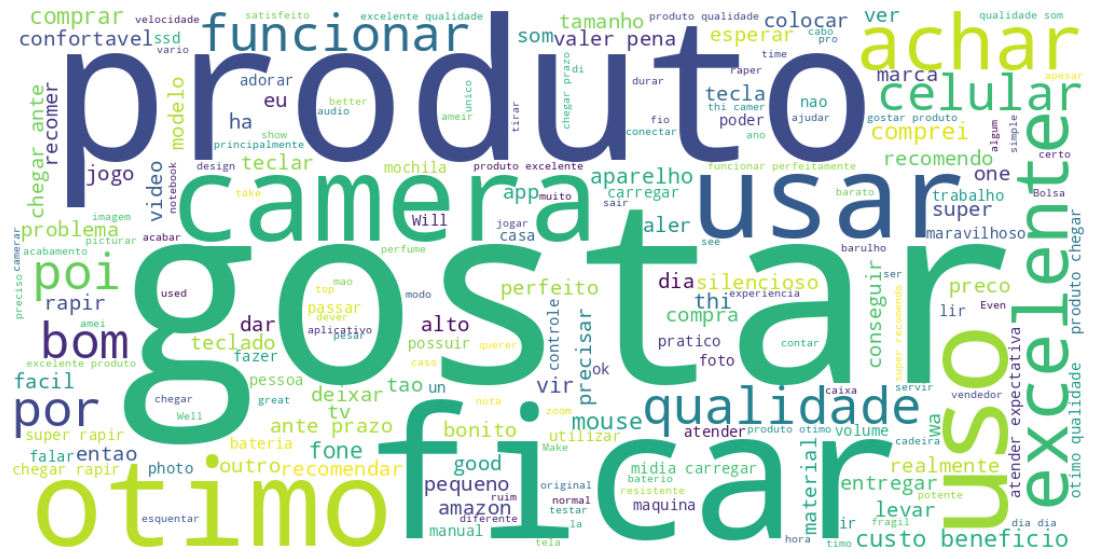

In [70]:
#PALAVRAS MAIS FREQUENTES

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([' '.join(tokens) for tokens in df['tokens_lema']])

#NUVEM
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Treinamento e Avaliação

In [40]:
df.rename(columns={'cleaned_Review': 'Review_Lemmatized'}, inplace=True)


In [41]:
from textblob import TextBlob

def create_sentiment(data, grams):
    data['polarity'] = 0.0
    data['subjectivity'] = 0.0
    data['sentiment'] = 0

    for row in data.itertuples():
        review = data.at[row[0], "Review_Lemmatized"]

        #TextBlob
        try:
            analysis = TextBlob(review)
            _ = analysis.ngrams(n=grams)

            polarity = analysis.sentiment.polarity
            subjectivity = analysis.sentiment.subjectivity

            data.at[row[0], "polarity"] = polarity
            data.at[row[0], "subjectivity"] = subjectivity

            if polarity > 0:
                data.at[row[0], "sentiment"] = 1
            elif polarity < 0:
                data.at[row[0], "sentiment"] = -1
            else:
                data.at[row[0], "sentiment"] = 0

        except Exception as e:
            data.at[row[0], "sentiment"] = 0

    return data

df = create_sentiment(df, 2)

In [72]:
create_sentiment(df, 2)

,Search Query,Product Title,Link,Review,Comment_Length,Review_Length,Review_Lemmatized,tokens,tokens_sem_stopwords,tokens_lema,polarity,subjectivity,sentiment,sentiment_vader,new_sentiment,cleaned_Review
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto.",Longo,292,necessidade comprar celular custo beneficio comecei pesquisando modelos vendem mercado deparei lideres sempre samsung motorolaapple custobeneficio aqui brasileu smartphones dessas marcas supracitadas nunca xiaomipor conseguinte analisei varios videos varias opcoes cabem citadas agora entregavam boa qualidade apenas algumas caracteristicas porem conjunto completo deixava sempre desejarpartindo premissa sai celular seguinte estadomarca samsungmodelo gran primeano lancamento armazenamento apenas gb memoria internaconsiderando valor mercado atual smartphones catastrficoassocio escolha marca condiz objetivo precisava boa tela tela melhor mercado celulares entrada necessidade boa bateria faz jus marca contar carregamento ultra rapido ainda oferecem buscava boa camera tira melhores fotos mercado nenhum celulares dessa categoria vem mesmas funcoes top linha visava celular travasse gb memoria ram roda jogos pesados play story call of duty genshin impact bem cheguei jogar pouco the legend of neverland roda graficos maximo leg poi propostas faixa preco desse aparelho da jogar todos jogos tranquilamente modo lightportanto aquisicao desse aparelho suprindo necessidades veio melhor pensavaja fiz aquisicao outro amigacomprem medo boa sorte produto,"[necessidade, comprar, celular, custo, beneficio, comecei, pesquisando, modelos, vendem, mercado, deparei, lideres, sempre, samsung, motorolaapple, custobeneficio, aqui, brasileu, smartphones, dessas, marcas, supracitadas, nunca, xiaomipor, conseguinte, analisei, varios, videos, varias, opcoes, cabem, citadas, agora, entregavam, boa, qualidade, apenas, algumas, caracteristicas, porem, conjunto, completo, deixava, sempre, desejarpartindo, premissa, sai, celular, seguinte, estadomarca, samsungmodelo, gran, primeano, lancamento, armazenamento, apenas, gb, memoria, internaconsiderando, valor, mercado, atual, smartphones, catastrficoa

In [43]:
print(df.columns)


Index(['Search Query', 'Product Title', 'Link', 'Review', 'Comment_Length',
       'Review_Length', 'Review_Lemmatized', 'tokens', 'tokens_sem_stopwords',
       'tokens_lema', 'polarity', 'subjectivity', 'sentiment'],
      dtype='object')


In [44]:
df["sentiment"].value_counts()

,count
sentiment,
0,7699
1,1780
-1,162


A maior parte das análises de sentimento foi classificada como neutra. Além disso, a quantidade de análises positivas é considerável, enquanto as negativas representam uma pequena fração.

In [45]:
#verificar só os positivos
df_pos = df[df['sentiment'] ==1]

In [46]:
#visualizando os positivos
df_pos.head()

,Search Query,Product Title,Link,Review,Comment_Length,Review_Length,Review_Lemmatized,tokens,tokens_sem_stopwords,tokens_lema,polarity,subjectivity,sentiment
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto.",Longo,292,necessidade comprar celular custo beneficio comecei pesquisando modelos vendem mercado deparei lideres sempre samsung motorolaapple custobeneficio aqui brasileu smartphones dessas marcas supracitadas nunca xiaomipor conseguinte analisei varios videos varias opcoes cabem citadas agora entregavam boa qualidade apenas algumas caracteristicas porem conjunto completo deixava sempre desejarpartindo premissa sai celular seguinte estadomarca samsungmodelo gran primeano lancamento armazenamento apenas gb memoria internaconsiderando valor mercado atual smartphones catastrficoassocio escolha marca condiz objetivo precisava boa tela tela melhor mercado celulares entrada necessidade boa bateria faz jus marca contar carregamento ultra rapido ainda oferecem buscava boa camera tira melhores fotos mercado nenhum celulares dessa categoria vem mesmas funcoes top linha visava celular travasse gb memoria ram roda jogos pesados play story call of duty genshin impact bem cheguei jogar pouco the legend of neverland roda graficos maximo leg poi propostas faixa preco desse aparelho da jogar todos jogos tranquilamente modo lightportanto aquisicao desse aparelho suprindo necessidades veio melhor pensavaja fiz aquisicao outro amigacomprem medo boa sorte produto,"[necessidade, comprar, celular, custo, beneficio, comecei, pesquisando, modelos, vendem, mercado, deparei, lideres, sempre, samsung, motorolaapple, custobeneficio, aqui, brasileu, smartphones, dessas, marcas, supracitadas, nunca, xiaomipor, conseguinte, analisei, varios, videos, varias, opcoes, cabem, citadas, agora, entregavam, boa, qualidade, apenas, algumas, caracteristicas, porem, conjunto, completo, deixava, sempre, desejarpartindo, premissa, sai, celular, seguinte, estadomarca, samsungmodelo, gran, primeano, lancamento, armazenamento, apenas, gb, memoria, internaconsiderando, valor, mercado, atual, smartphones, catastrficoassocio, escolha, marca, condiz, objetivo, pre

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def create_sentiment_vader (text):
  result = analyzer.polarity_scores(text)['compound']
  return result

def analise2(score):
  if (score >= -0.05) & (score <= 0.05):
    return 'neutral'
  elif score > 0.05:
    return 'positive'
  return 'negative'

In [50]:
df["sentiment_vader"] = df["Review_Lemmatized"].apply(create_sentiment_vader)

In [51]:
df['new_sentiment'] = df['sentiment_vader'].apply(analise2)

In [52]:
df_neg = df[df["new_sentiment"] == "negative"]

In [59]:
df_neg.head()

,Search Query,Product Title,Link,Review,Comment_Length,Review_Length,Review_Lemmatized,tokens,tokens_sem_stopwords,tokens_lema,polarity,subjectivity,sentiment,sentiment_vader,new_sentiment
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Minha experiência de 10 dias de uso com o Xiaomi Redmi Note 12 128GB / 6GB RAM:Chegou rápido em cerca de 3 dias úteis.-Prós:*Tela: Excelente, os 120Hz trazem uma experiência visual fluida e agradável para filmes e fotos.*Câmera: Ótima, os 50MP captam ótimas fotos em ambientes com boa iluminação natural.*Processador: Ótimo, O Snapdragon 865 é um bom processador para esta faixa de preço, oferece um ótimo desempenho para apps populares do dia a dia, sem travamentos.*Games: Muito Bom, dos jogos que testei tive uma ótima experiência de fluidez e poucos travamentos, destaque para o Call of Duty mobile que possui uma excelente otimização para este aparelho. Rodei nestas configs no app Game Booster: -FreeFire 60FPS [Ultra] -eFootball 2023 60 FPS [High] -Call of Duty: Mobile 60 FPS [High] -PUBG 37 FPS [Low ] -FIFA Mobile 30 FPS [Medium] -Runescape 3 30~50 FPS[Low] -Genshin Impact 25~30FPS [Low] -Fornite 15~30FPS[Low]É importante ressaltar que este é um Smartphone de entrada e não voltado para gamers, então eventuais quedas de frames e leves travamentos são esperados em alguns jogos. Apesar disso o desempenho foi satisfatório em todos os jogos menos no modo Battle Royale do Fornite onde a queda de frames foi alta pois o jogo ainda não é otimizado para esse celular, porém em outros modos com mapas menores ele se mantém em 25~30FPS.*Bateria: Excelente, dura o dia todo, destaque para o carregador ultra-rápido de 33W que permite uma carga completa em apenas 1 hora.-Contras:*Bloatwares chineses: ele vem com alguns apps chineses pré instalados (AliExpress,Shopee, TikTok...) . Esses aplicativos podem solicitar permissões de acesso e exibir propagandas. Porém, é possível remover ou desativar eles.*Embora a tela seja de 120Hz, nem todos os apps suportam essa taxa de atualização. Isso inclui o aplicativo do YouTube, que tem uma restrição máxima de 60FPS 1080p, não permitindo resoluções maiores como 2k e 4k.*Não grava videos a 60FPS e não grava em 4K. A resolução máxima de gravação dele é 1080p 30fps. No entanto, oferece o modo de câmera lenta (slow motion) que grava videos a 960FPS 720p.*Lente Macro de apenas 2 MP. Além de pecar em fotos noturnas.Resumindo é um excelente Smartphone pela sua faixa de preço, recomendo pela qualidade de acabamento do aparelho e fluidez de uso. Ele já vem com uma capa de silicone e uma película de proteção na caixa.",Longo,387,experiencia dia uso xiaomi redmi note gb gb ramchegou rapido cerca dia uteisprostela excelente hz trazem experiencia visual fluida agradavel filmes fotoscamera tima mp captam otimas fotos ambientes boa iluminacao naturalprocessador timo snapdragon bom processador faixa preco oferece otimo desempenho apps populares dia dia travamentosgames bom jogos testei otima experiencia fluidez poucos travamentos destaque call of duty mobile possui excelente otimizacao aparelho rodei nestas configs app game booster freefire fps ultra efootball fps high call of duty mobile fps high pubg fps low fifa mobile fps medium runescape fpslow genshin impact fps low fornite fpslow importante ressaltar smartphone entrada voltado gamers entao eventuais quedas frame leves travamentos esperados alguns jogos apesar disso desempenho satisfatorio todos jogos menos modo battle royale fornite onde queda frame alta poi jogo ainda otimizado celular porem outros modos mapas menores mantem fpsbateria excelente dura dia todo destaque carregador ultrarapido w permite carga completa apenas horacontrasbloatwares chinese vem alguns apps chinese pre instalados aliexpressshopee tiktok aplicativos podem solicitar permissoes acesso exibir propaganda porem possivel remover desativar elesembora tela hz todos apps suportam taxon atualiz

In [54]:
df.head()

,Search Query,Product Title,Link,Review,Comment_Length,Review_Length,Review_Lemmatized,tokens,tokens_sem_stopwords,tokens_lema,polarity,subjectivity,sentiment,sentiment_vader,new_sentiment
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VERSAO GLOBAL) (Ice Blue),https://www.amazon.com.br/dp/B0BZ7RJDHD,"Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregamento ultra rápido que eles ainda oferecem).- Buscava uma boa câmera ( não tira as melhores fotos do mercado, mas nenhum dos celulares dessa categoria vem com as mesmas funções dos top de linha).- Visava um celular que não travasse ( esse tem 6gb de memória ram, roda até os jogos mais pesados da play story como: Call Of Duty, Genshin Impact, bem como já cheguei até a jogar um pouco de The Legend of Neverland, não roda com os gráficos no máximo sem leg, pois essa não é uma das propostas da faixa de preço desse aparelho, mas dá pra jogar todos os jogos tranquilamente em modo mais light).Portanto, a aquisição desse aparelho está suprindo minhas necessidades e veio melhor do que eu pensava.Já fiz até a aquisição de outro para uma amiga.Comprem sem medo e boa sorte com o produto.",Longo,292,necessidade comprar celular custo beneficio comecei pesquisando modelos vendem mercado deparei lideres sempre samsung motorolaapple custobeneficio aqui brasileu smartphones dessas marcas supracitadas nunca xiaomipor conseguinte analisei varios videos varias opcoes cabem citadas agora entregavam boa qualidade apenas algumas caracteristicas porem conjunto completo deixava sempre desejarpartindo premissa sai celular seguinte estadomarca samsungmodelo gran primeano lancamento armazenamento apenas gb memoria internaconsiderando valor mercado atual smartphones catastrficoassocio escolha marca condiz objetivo precisava boa tela tela melhor mercado celulares entrada necessidade boa bateria faz jus marca contar carregamento ultra rapido ainda oferecem buscava boa camera tira melhores fotos mercado nenhum celulares dessa categoria vem mesmas funcoes top linha visava celular travasse gb memoria ram roda jogos pesados play story call of duty genshin impact bem cheguei jogar pouco the legend of neverland roda graficos maximo leg poi propostas faixa preco desse aparelho da jogar todos jogos tranquilamente modo lightportanto aquisicao desse aparelho suprindo necessidades veio melhor pensavaja fiz aquisicao outro amigacomprem medo boa sorte produto,"[necessidade, comprar, celular, custo, beneficio, comecei, pesquisando, modelos, vendem, mercado, deparei, lideres, sempre, samsung, motorolaapple, custobeneficio, aqui, brasileu, smartphones, dessas, marcas, supracitadas, nunca, xiaomipor, conseguinte, analisei, varios, videos, varias, opcoes, cabem, citadas, agora, entregavam, boa, qualidade, apenas, algumas, caracteristicas, porem, conjunto, completo, deixava, sempre, desejarpartindo, premissa, sai, celular, seguinte, estadomarca, samsungmodelo, gran, primeano, lancamento, armazenamento, apenas, gb, memoria, internaconsiderando, valor, mercado, atual, smartphones, catastrficoassocio, escolha

In [55]:
df["new_sentiment"].value_counts()

,count
new_sentiment,
neutral,7512
positive,1911
negative,218


existem erros, mas em geral acertou, deduzir a partir dai, os comentarios eram mais positivos que negativos, mas ainda há um numero elevador de neutros

## Distribuição dos Sentimentos

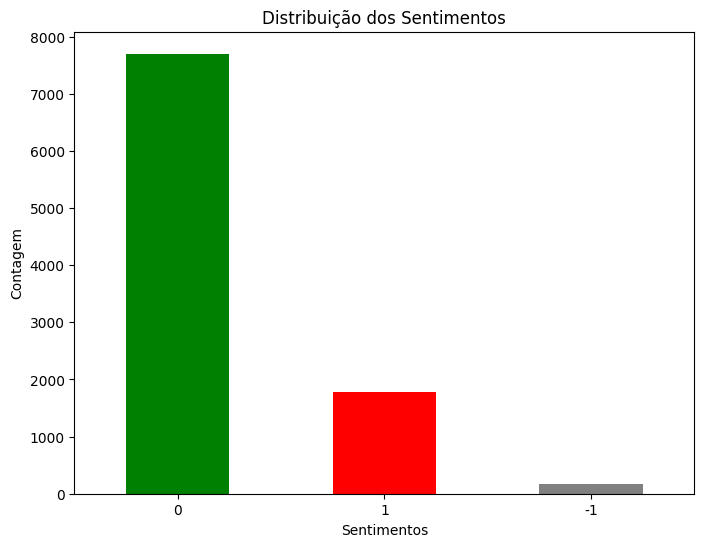

In [66]:
#contagem dos sentimentos
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribuição dos Sentimentos')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()


# CONCLUSÃO



A análise revelou que um dos produtos mais avaliados são os  itens de mochila de viagem e fones de ouvido.
Entre os termos mais pesquisados temos o smartphone, mouse e caixa de som portátil.

Também pude identificar que a maior quantidade de comentários desse dataset possui um tamanho médio, ou seja, são comentários que os usuários relataram as experiências que obteram ao adquirir o produto com detalhes e características,  o que é uma coisa boa para a análise, pois assim se dá um contexto maior.

Ao analisar as duplicatas, verifiquei que haviam muitos comentários curtos e repetitivos, pois não ofereciam um contexto suficiente para as próximas etapas, foram removidos  174 comentários de um total de 9815.

Umas das palavras mais frequentes nas avaliações são: produto, gostar, usar, funcionar, bom.

A grande maioria das avaliações foram classificadas como neutras (7699), indicando que muitos usuários deixaram comentários objetivos, genéricos ou com pouca carga emocional. 1780 comentários foram positivos, o que sugere uma boa percepção geral dos produtos analisados e apenas 162 avaliações foram negativas, o que demonstra um baixo índice de insatisfação.

A maioria dos consumidores relataram suas experiências de uma forma mais descritiva e imparcial.

Há um equilíbrio saudável entre avaliações positivas e negativas, com predomínio das positivas.

Uma melhoria possível para futuras análises seria aplicar filtros e refinamentos linguísticos mais específicos, especialmente nas avaliações neutras, para tentar extrair melhor os sentimentos implícitos. Isso poderia refinar os resultados e aumentar a precisão da classificação.


